In [ ]:
# NEURAL NETWORKS DO NOT DO DATA CLEANING!

# IF TF prefers channels _Last-> we need to arrange our images before passing to NN
# THEANO -> Channels_first -> WE need to arrange our images


# in our NLP problem -> preprocessed sentences were analyzed
# in our CV problems-> images are preprocessed 
!ls


data  sample_data


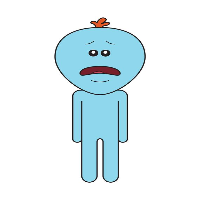

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('000003.jpg')
img_resized = cv2.resize(img, (200,200)) # SMALL DISTORTION are WELCOME! 
cv2_imshow(img_resized)

In [ ]:
img_resized[0] # EACH element is a LIST of 3 elements -> CHANNEL value-> 3 channels
img_resized.shape

(200, 200, 3)

In [ ]:
img_resized[5][0] # 5th row, 0th column

# uint8 -> each channel is unsigned (no negative signs) and 8 bit in size 

array([255, 255, 255], dtype=uint8)

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import numpy as np
from keras import backend # backend -> tf/theano etc
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential # no parallel, no cycles 

# TF can create all = DAG, DCG, IAG, ICG 

TensorFlow 1.x selected.
1.15.2


Using TensorFlow backend.


In [ ]:
# SUCH networks can be VERY large and usually only 1 instance runs 
# otherwise RAM will be cluttered and all will crash! (OS+model+harddisk)

# NO MORE THAN 1 INSTANCE of such programs should be RUNNING! 

# SINGLETON -> class which can have ONLY 1 instance -> TASK MANAGER! 

In [ ]:

 # the method declared after @st... will be STATIC
  # ONLY 1 copy of it will RUN from the beginning till the end of program
  # STATIC keyword -> STATIC MEANS ALWAYS PRESENT (Static CURRENT!)

  # DEPTH = Channel depth = channel dimension = no. of channels 
  #                       
# KERAS needs us to arrange -> IMAGE STRUCTURE 
    # Tensorflow -> CHANNEL_LAST -> (height, width, depth)
    # Theano -> CHANNEL_FIRST -> (depth, height, width)
    # https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/


# PandaVGG = ((Conv + ReLU + BN) + MP + Dropout + ( (Conv + ReLU + BN) + MP + Dropout)XN
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

class PandaVGG:
  @staticmethod
  def build( height, width, depth, classes) :
  
    # let's assume we are on TF, else we will switch to Theano 
    inputShape = (height, width, depth)
    channel_dim = -1  # last element -> CHANNELS_LAST 
    if backend.image_data_format() == 'channels_first':
      inputShape = (depth, height, width)
      channel_dim = 1
    # { data, representation } => [data,representation] or [representation, data]
    #  { images, channels}     => channels_last or channels_first 
    # data -> 2 d images -> height [row], width [columns] 

    HP_block1_conv_dim = 32    
    HP_small_pattern = (3,3)
    HP_block2_conv_dim = 64
    HP_block3_conv_dim = 128
    HP_block4_conv_dim = 256
    HP_block5_dense_dim = 1024
    HP_large_pattern = (2,2)
    HP_dropout_type1 = 0.25
    HP_dropout_type2 = 0.50
    
    model = Sequential()
# PandaVGG = (Conv + ReLU + BN) + MP + Dropout + ((Conv + ReLU + BN)X2 + MP + Dropout) X N
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

    # block1 starts-> (Conv + ReLU + BN) + MP + Dropout 
    model.add(Conv2D(HP_block1_conv_dim, HP_small_pattern, padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim)) # our data needs to be normalized, not our channels!!!
    model.add(MaxPooling2D(pool_size=HP_small_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block1 complete 

    #block2 starts -> (Conv + RelU + BN) X2   + Compress + Drop 
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # BLock 2 ends 

    #Block3 starts
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block3 ends

    #Block4 starts
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block4 ends

    # final block5- classification/prediction
    model.add(Flatten())
    model.add(Dense(HP_block5_dense_dim))
    model.add(Activation('relu'))
    # optional: Batch Normalization and Dropout -> to avoid overfitting 
    model.add(BatchNormalization())
    model.add(Dropout(HP_dropout_type2))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    # final block ends

    return model




In [ ]:
 # minimum image sizes that NN can clearly identify
# black & white images                          -> 28X28 
# multi-channels images (3 channels in our case)-> 96X96 (3 X (32,32)) 

#model = PandaVGG.build(96, 96, 3, 3)
model.summary() 

# 32 filters -> each filter is 3X3 -> PER CHANNEL
# 1 filter = [ [w11,w12,w13],[w21,w22,w23],[w31,w32,w33]] -> 9 weights 
# 32 X 9 = 288 -> 1 channel

# 288 X 3 = 864 weights
# 32 filters generated, each with 1 bias
# weights + bias = 864 + 32 = 896

# EXPORT the built model -> right approach 
# next file-> train.py -> import the model 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)       

In [ ]:
# data_clean.py 
# in real life, should have been a separate file
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
from sklearn.preprocessing import LabelBinarizer # Label encoding, 1-hot encoding, multi-encoding
# LABEL binarizer is a 1-hot encoded MATRIX 
import cv2
import numpy as np
import random
import imutils
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.model_selection import train_test_split


In [ ]:
# if this was a User Facing software or web/mobile app, we would have been using a UI
HP_dataset = 'data'
HP_model_path = 'bin/model/myModel.h5'
HP_binarized_labels = 'bin/labels/labels.bin'
HP_metrics_storage = 'eval'
HP_test_dataset = 'test'
HP_epoch = 100
HP_init_lr = 1e-3 # learning_rate = 0.001
HP_batch_size = 32
HP_image_dim = (96,96,3)

In [ ]:
data = []
labels = [] 
# read all images
all_images = sorted(list(paths.list_images(HP_dataset)))
all_images[:5]

['data/dogs/00001.png',
 'data/dogs/00005.png',
 'data/dogs/00087.png',
 'data/dogs/00120.png',
 'data/dogs/00132.png']

In [ ]:
random.seed(42)
random.shuffle(all_images)
all_images[:5]
print(len(all_images))

471


In [ ]:
import os
for impath in all_images:
  img = cv2.imread(impath)
  resized = cv2.resize(img, (HP_image_dim[0],HP_image_dim[1]) )
  imageData = img_to_array(resized)
  data.append(imageData)
  # extract label from filename (2nd last element) / \\ 
  label = impath.split(os.path.sep)[-2]
  labels.append(label)

print(len(labels))
#print(data[0])
# X and Y -> data and labels 

471


In [ ]:
# CONVERT labels to MATRICES -> if input is matrix, output should be MATRIX!
# data[element] -> Array of arrays 
labels = np.array(labels)
lb = LabelBinarizer()
binarized_labels = lb.fit_transform(labels)
print(binarized_labels[0])
print(binarized_labels[1])
print(len(binarized_labels))

# 1-hot encoding v/s          Label Binarizing 
# Inputs                      Labels (outputs)
# creates new columns         creates 1-hot encoding in same element 
#                             [ [dog] , [pikachu], [shaktiman]]
#                             4 -> 1 0 0  -> number's binary rep is used to gen Binarizers 


[0 1 0]
[0 0 1]
471


In [ ]:
binarized_labels[0].dtype

dtype('int64')

In [ ]:
norm_data = np.array(data, dtype='float') / 255 
trainx, testx, trainy, testy = train_test_split(norm_data,binarized_labels,test_size=0.2,random_state=42)
# train and test data ready 
# Augmentation generators are logic for augmentation
# APplication of augmentation is after this

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1,
                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


# mathematical ops -> new_data = old_data * sin(7)

# Regularization -> L1/L2 (ridge/lasso), Dropout, early stopping ,data augmentation 
# whenever working with images, we don;t want our model to overfit
# FACE -> face directly looking at me
# FACE -> 30 degrees to right, and still looking at me, we should be able to recognize it 
# as well!

# we will generate ALL possible MUTATION/TRANSFORMATIONS of our images 

# data_cleaning.py ends here

In [ ]:
print(len(trainx))
print(len(trainy))

376
376


In [ ]:
# previous class is also correct, use any
class CorrectPandaVGG: # model.fit(), model.predict() ; for them you need object
  @staticmethod
  def create(width, height, depth, classes): # TF was CHANNELS_LAST -> depth is mentioned as the last value, after w&h
    model = Sequential()
    inputShape = (height, width, depth) # the expected shape as per TF
    # but what if this program is then run on some other framework? which follows channels_first instead?
    chanDim = -1 # CHANNELS_LAST set as default 
    # now check if some other library except TF or CNTK is running
    if backend.image_data_format() == "channels_first":
      inputShape = (depth, height, width) # this chan_dim is a measure of DEPTH of data-> so makes sense only for multidimension data, such as image or video
      chanDim = 1 # for Theano (if tf or CNTK is not running)
    # Design our network
    # FIRST BLOCK = Conv + ReLU + BN + MP + D
    model.add(Conv2D(32,(3,3), padding='same', input_shape=inputShape)) # all keras backends compatible
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim)) # Normalization needs to be along axis- R,G and B! 
    # After BN, the important FILTERED features are available now as WEIGHTS 
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25)) 
    # Learning Layers -> Conv + ReLU + BN
    # that means, to increase the number of features, i need to repeat the Conv+ReLU+BN to generate more and more
    # features
    # MAX Pool is to compress, and Dropout -> randomly select features for partial learning 
    
    # BLOCK 2 should have slightly more features, because we have compressed and DROPPED the data!!! 
    # we should generate more activity maps henceforth to compensate for data loss 
    # BLOCK 2 = (Conv->Relu->BN)X2 + MP + D
    # LET X = Conv->Relu->BN
    # Block 2 = 2 X + MP + D
    # My network so far = Block 1 + Block 2
    # FeatureClassification = Flatten + Dense(ReLU) + Dense(SoftMax)
    # PandaVGG = X + MP + D +   ( 2 X + MP + D ) * no_of_times_you_want_to_repeat + FeatureClassification
    # First X -> got activity map for 100% of data (X=Conv+Relu+BN)
    # then Activity Maps are compressed and sent to subsequent layers (MaxPooling)
    # Dropout to learn about only a section of data (Dropout)
    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> finer features selected -> BIGGER compression
    model.add(Dropout(0.25))

    # block 3
    model.add(Conv2D(128,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> more data lost -> BIGGER compression
    model.add(Dropout(0.25))
    # block 4
    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> more data lost -> BIGGER compression
    model.add(Dropout(0.25))
    #VGG has now become = block1 +block2+block3+block4 + FeatureClassification
    # VGG= X(32)+MP(3,3)+D+2X(64)+MP(2,2)+D+2X(128)+MP(2,2)+D+2X(256)+MP(2,2)+D+Flatten+DenseRelu+DenseSoftMax
    # Where X = Conv2D + ReLU + BN 
    # Our PandaVGG now has 32 layers

    #FINAL Classification block
    # ALL micro and macro features (FILTERsX Input = Activity Map) have been generated
    # SO FLATTEN out to bring all axises into same DIMENSION
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    # optional: EVEN more regularization
    #model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    #regularization over, Classify using SOFTMAX
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model 

In [ ]:
# TRAIN.py should start! 

from keras.optimizers import Adam
# or use the previous class, both are same
model = CorrectPandaVGG.create(HP_image_dim[0], HP_image_dim[1], HP_image_dim[2],len(lb.classes_)))
optimizer = Adam(lr=HP_init_lr, decay= HP_init_lr/HP_epoch)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



# 1image = 10% shaktiman, 50% pikachu, 40% doggie (categorical_cross)
# 1image = 0.3% shaktiman, 99.5% pikachu, 0.2% doggie (sparse_categorical_cross)

# binary_crossentropy, sparse_categorical_crossentropy -> image classification
# categorical_crossentropy -> object detection

# DECAY -> when training is over, we want LR to be 0! 
# LR -> 0 means that perfect answer is reached 
# ADAPTIVE LEARNING-> inc lr if far from ans, dec if closer to
# inc/dec -> decay rate 

# v= u + at
# final_velocity = init_velocity + acceleration * time  
# final_lr = init_lr + decay*epoch
# 0 = 0.001 + decay_rate * epoch
# decay_rate =  - init_lr / epoch # minus anyway indicates deacceleration 


# SPARSE_categorical_crossentropy -> SPARSE will ensure that only 1 prob was highest
# categorical_crossentropy  -> just prob distribution -> multiple classes could have
# nearby probailities! MULTIPLE CLASSES could have been detected in 1 image!!!
# if an image has both Shaktiman and Pikachu-> we will be able to get some probab_dist for both



In [ ]:
history = model.fit_generator(aug.flow(trainx, trainy, batch_size=HP_batch_size), validation_data=(testx,testy),steps_per_epoch = len(trainx)// HP_batch_size,epochs=HP_epoch)

Epoch 1/100
11/11 [==============================] - 17s 2s/step - loss: 5.3694 - accuracy: 0.6948 - val_loss: 1.2452 - val_accuracy: 0.4526
Epoch 2/100
11/11 [==============================] - 16s 1s/step - loss: 0.4461 - accuracy: 0.9186 - val_loss: 0.8792 - val_accuracy: 0.6000
Epoch 3/100
11/11 [==============================] - 16s 1s/step - loss: 0.1941 - accuracy: 0.9564 - val_loss: 0.7482 - val_accuracy: 0.6526
Epoch 4/100
11/11 [==============================] - 16s 1s/step - loss: 0.2720 - accuracy: 0.9331 - val_loss: 1.2801 - val_accuracy: 0.3789
Epoch 5/100
11/11 [==============================] - 16s 1s/step - loss: 0.1354 - accuracy: 0.9602 - val_loss: 1.1814 - val_accuracy: 0.3053
Epoch 6/100
11/11 [==============================] - 16s 1s/step - loss: 0.1020 - accuracy: 0.9767 - val_loss: 1.2649 - val_accuracy: 0.2421
Epoch 7/100
11/11 [==============================] - 16s 1s/step - loss: 0.1846 - accuracy: 0.9593 - val_loss: 1.6620 - val_accuracy: 0.2632
Epoch 8/100
1

In [ ]:
# Exceptions -> symptoms not cause -> read your code again -> fix logical errors
import pickle
HP_model_path = 'bin/model/myModel.h5'
HP_binarized_labels = 'bin/labels/labels.bin'
model.save(HP_model_path)
f = open(HP_binarized_labels, 'wb') # our integer is represent in binary format!
f.write(pickle.dumps(lb))
f.close()
print(lb.classes_)
# end of train.py

['dogs' 'pikachu' 'shaktiman']


In [ ]:
# Beginning of Score.py

import pickle
import numpy as np
import imutils
import cv2
import os
from keras.preprocessing.image import img_to_array 
from keras.models import load_model 

# Load the model and binarized labels
HP_model_path = 'bin/model/myModel.h5'
HP_binarized_labels = 'bin/labels/labels.bin'
# assume model is already loaded in model variable
f = open(HP_binarized_labels, 'rb')
mylabels = f.read()
binarized_labels = pickle.loads(mylabels)

# model.load() should be written
# model.compile() -> else model will not work!!! 

HP_test_img = '/content/test/pikadoggie2.jpg'
img = cv2.imread(HP_test_img)
copy_img = img.copy()
img = cv2.resize(img, (96,96))
img = (img*1.0)/255.0
# this is a single image, not a sequence of images 

# i will need convert it to the form which my model can accept 
# MODEL expecting a sequence of images, not a single image 
# Model is expecting (None, 96, 96, 32) -> None indicates that data is NOT participating in DL
# our current shape is (96,96,32)
img_to_feed_nn = np.expand_dims(img, axis=0) # axis = 0 -> increase dim column wise on that pos
# post this ops-> (1,96,96,32) 

# input is MATRIX of Matrices not a single image (matrix of pixels in 3 channels)


In [ ]:
img_to_feed_nn.shape

(1, 96, 96, 3)

In [ ]:
prediction = model.predict(img_to_feed_nn)
print(prediction)
print(binarized_labels.classes_)
# categorical_crossentropy -> because multiple classes prob is being checked, 
# total_classes >= sum_of_probabilities >= 0
# categorical_crossentropy is SIGMOID for individual CLASSES 

# sparse categorical crossentropy-> SUM of all the probabilities is 1
# my dog classes has only 30 samples 
# i should have had at least 200 samples of EACH class

# This equation y=mx+c, is more biased towards the classes
# that were sufficiently represented
# 

# end of Score.py

[[1.461524e-20 1.000000e+00 6.764287e-27]]
['dogs' 'pikachu' 'shaktiman']


In [ ]:
# this will require at least 1000 images per class, and at least 3 classes 
# below 3000 sample data (train/test) this algo may behave unexpectedly
 


In [ ]:
 # BATCH NORMALIZATION FUN FACT 
    # we will be calculating -> mu and sigma for normalization 
    # parameters will be generated
    # but in back/prop-> IS my data(images) changing? if my data is not changing
    # then mu and sigma for that data/batch will not change!!! 
    # Non-TRAINABLE parameters -> that cannot be trained -> back-prop's differentiation 
    # will NOT change their value! 

In [ ]:
# https://1drv.ms/u/s!AhM-uOEWdqAeqG9rJT9XKZp62sCj?e=hl5sKg
# https://1drv.ms/u/s!AhM-uOEWdqAexWFgIl-sNiHnq0JM?e=V3cG4m

# Pattern Recognition: pattern recognition by Sergios Theodoridis, Konstantinos

In [ ]:
# CONVOLUTIONAL neural networks + Recurring Networks + Lot of unknown stuff = Brain

In [ ]:
# Color theory: https://www.springer.com/gp/book/9780792399285

# Concious / Unconcious -> myth 
# Cerebrum, Cerebellum, Corpus callosum, medulla -> Biologist 
# biologist and neurologist -> CLASSFIED brains into activities
# 
# They are now proven to be partial knowledges!

# Optical nerve was working fine but postoral lobe responsible for
# vision was damaged 

# Neurosurgeons -> clipped optical nerve and connected to a different segment of brain
# within matter of months, BRAIN taught itself to SEE from the area where it was not supposed
# to! 

# BRAIN -> Weights and BIASES and unknown parameters! 

In [ ]:
# pandavgg model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_55 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 64)       

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________